In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
dataset=pd.read_csv("winequality-red.csv",sep=';')
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


##### We shall indicate what each variable explains :
 1) Fixed acidity : non-volatile acids that do not evaporate easily
 2) Volatile acidity : acetic acid content that gives of a vinegar taste 
 3) Citric acid : is a preservative to increase acdity smaller quantities fresher wine with more flavour
 4) Residual sugar : is the amount of sugar that remains after fermantation
 5) chlorides : salt
 6) free sulfur dioxide : prevnts oxidation in wine
 7) total sulfur dioxide 
 8) density : sweet wines have higher density 
 9) pH : the level of acidity
 10) sulphates : acts as an antimicrobial
 11) alcohol : amount of alcohol in the wine
 

#### Dependent Variable : 
Quality

# Data Preprocessing : 

In [36]:
dataset.info()
dataset.isnull().sum()
#spliting the independent and dependent variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Descriptive statistics

In [37]:
dataset.describe()
# we observed that scaling is a requirement (Values are too large)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Observing what values our independent variable takes

In [38]:
dataset['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [39]:
dataset['quality'].value_counts()
# we shall turn the quality to a classification as an attempt to imporve prediction power
# 7>= is 'good' and 4<= is 'bad'

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

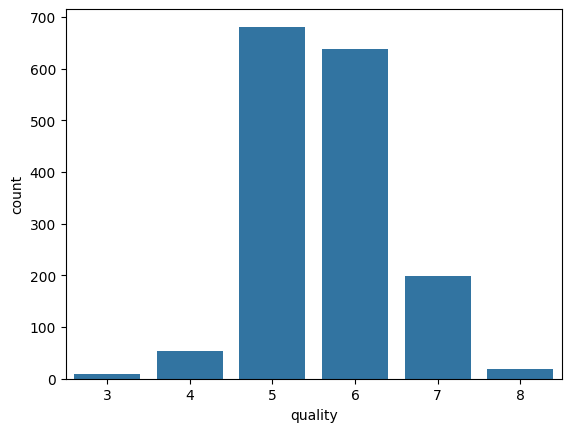

In [40]:
# Getting the distribution of the quality 
sb.countplot(x='quality',data=dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

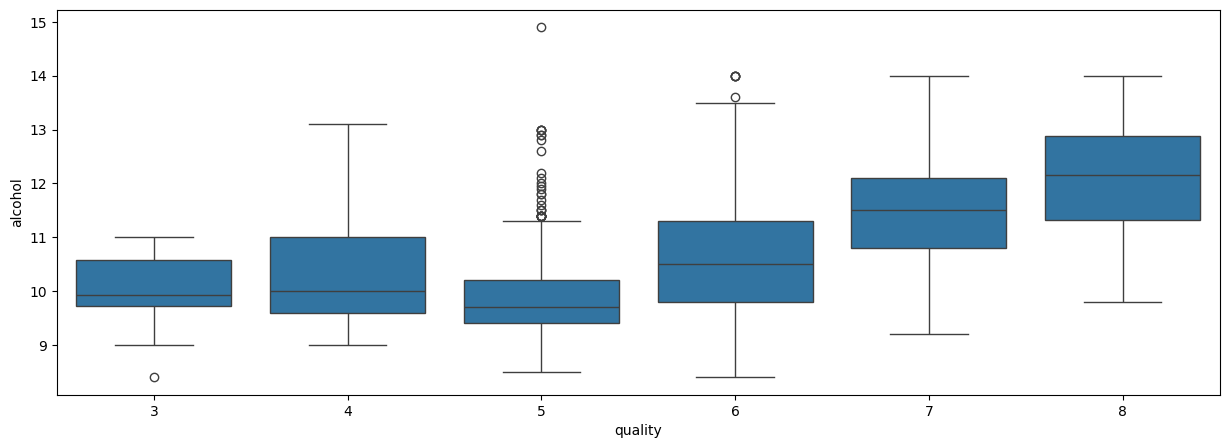

In [41]:
# compare the quality against some independent variables in this case we tried alcohol on quality
plt.figure(figsize=(15,5))
sb.boxplot(x='quality', y='alcohol',data=dataset)

## Observing correlation amongst the variables 

<Axes: >

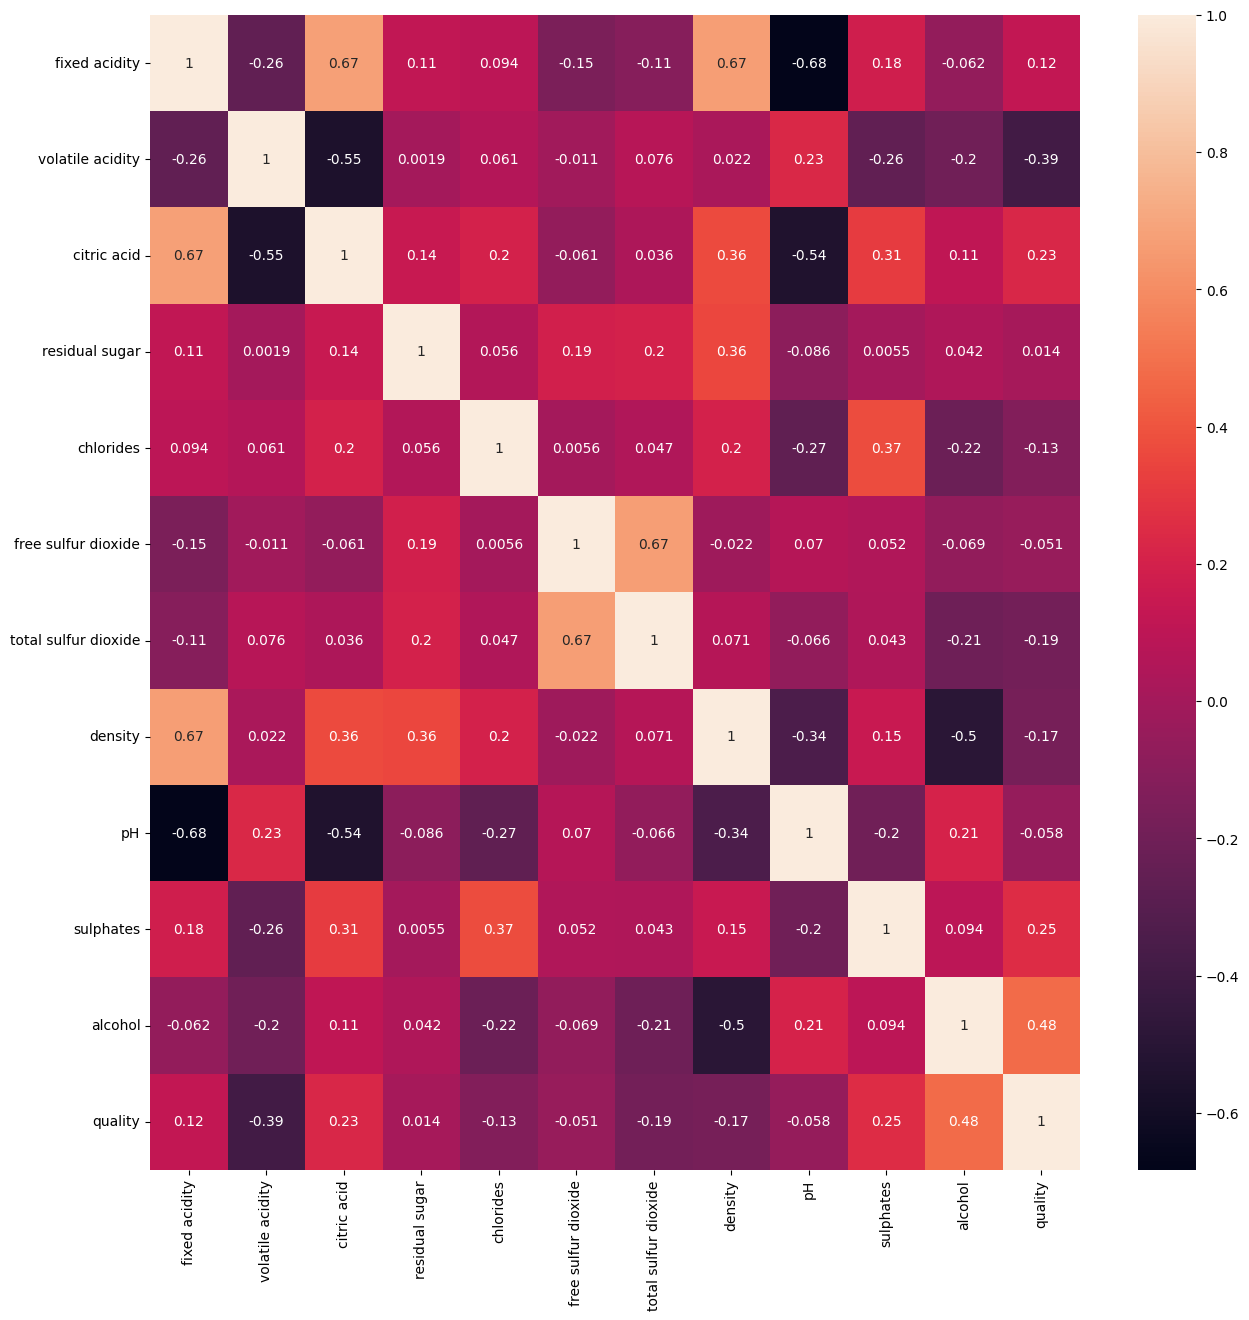

In [42]:
plt.figure(figsize=(15,15))
sb.heatmap(dataset.corr(),color='k',annot=True)

## Below we shall create an arbitray classification Bin 

In [43]:
bins=(2,6.5,8)
group_names=['bad','good']
dataset['quality']= pd.cut(dataset['quality'],bins=bins,labels=group_names)

# Importing Sklearn libraries

In [44]:
# Label Encoding given our arbitray classification Bin in order to maintain ranking 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
dataset['quality']=le.fit_transform(dataset['quality'])



In [45]:
dataset.head(10)
#hence 1 - good and 0-bad

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


## Now splitting the independent and dependent variables

In [46]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [47]:
print(y)

[0 0 0 ... 0 0 0]


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Feature scaling 
recall that some values are larger than others hance we must scale them 

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Creating a Function for our Machine Learning models

In [50]:
# In this case our models are all classification models
def models(X_train,y_train) :
    # 1) LINEAR MODELS
        #Logistic regression 
    from sklearn.linear_model import LogisticRegression 
    log=LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
        #Support Vector Machine (SVM)
    from sklearn.svm import SVC
    svc_linear=SVC(kernel='linear',random_state=0)
    svc_linear.fit(X_train,y_train)
    
    # 2) NON-LINEAR MODELS
        #KNeighborsClassifier Method
    from sklearn.neighbors import KNeighborsClassifier 
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
        #Kernel rbf SVM
    from sklearn.svm import SVC 
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,y_train)
        #Gaussian Naive Bayes 
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,y_train)
        # Decision Tree 
    from sklearn.tree import DecisionTreeClassifier
    dtree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    dtree.fit(X_train,y_train)
        #Random Forest
    from sklearn.ensemble import RandomForestClassifier 
    rforest=RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=0) # we can change the n_estimators
    rforest.fit(X_train,y_train)

    #Printing the model accuracy on the training set 
    print('Logistic regression accuracy :' , log.score(X_train,y_train))
    print('Support vector machine accuracy :' , svc_linear.score(X_train,y_train))
    print('KNeighborsClassfier accuracy :' , knn.score(X_train,y_train))
    print('Kernel rbf accuracy :' , svc_rbf.score(X_train,y_train))
    print('Gaussian Naive Bayes accuracy :' , gauss.score(X_train,y_train))
    print('Decision Tree accuracy :' , dtree.score(X_train,y_train))
    print('Random Forest accuracy :' , rforest.score(X_train,y_train))
    
    return log,svc_linear,knn,svc_rbf,gauss,dtree,rforest



#### Evaluating Performance

In [51]:
model=models(X_train,y_train)

Logistic regression accuracy : 0.8733385457388585
Support vector machine accuracy : 0.8537920250195465
KNeighborsClassfier accuracy : 0.8983580922595777
Kernel rbf accuracy : 0.893666927286943
Gaussian Naive Bayes accuracy : 0.8358092259577795
Decision Tree accuracy : 1.0
Random Forest accuracy : 1.0
